# Weighted graph theory measures on numpy arrays.

This ipynb file aims to define the "Small-Worldness" measure (and other relevant weighted graph measures) for simple numpy array data containers,
in which a numpy array of shape (n_nodes, n_nodes) depicts a weighted network matrix. Hereby the value of matrix[i, j] stands for the strength of the connection (i.e. the weight) between node i and node j.

This code is written in order to analyze brain connectivity data, as for example created by a connectivity measure between different EEG signals. This code especially aims to be easily applicable to [MNE-Python](https://github.com/mne-tools/mne-python) data structures.





To begin with the code, we have to use our own install of networkx, since the original repo doesn't shuffle weights properly when creating random/lattice references.

In [3]:
!pip uninstall networkx
!git clone https://github.com/DiGyt/networkx/ -q
!pip install -e networkx
#!pip install -e networkx
#!pip install networkx --no-index --find-links networkx
!pip3 install python-language-server
#!pip install -U setuptools
#!pip install ./networkx
#!cd ./networkx
!pip install -e networkx

fatal: destination path 'networkx' already exists and is not an empty directory.
ERROR: content/networkx is not a valid editable requirement. It should either be a path to a local project or a VCS URL (beginning with svn+, git+, hg+, or bzr+).


Now we can start with importing the neccessary stuff:

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

fatal: destination path 'networkx' already exists and is not an empty directory.
Obtaining file:///content/networkx
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


## Data generation
First, we need to generate a fake connectivity matrix / graph. Since we want to compare this graph against random graphs later, we can not simply generate a random matrix, but generate a non-random one.

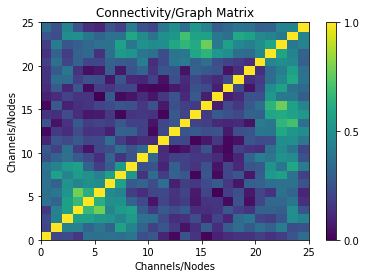

In [3]:
def generate_graph(n_nodes, regularity=0.1):
  # start with a random matrix
  matrix = np.random.rand(n_nodes, n_nodes)

  # make funny patterns:
  for i in range(n_nodes):
    for ii in range(n_nodes):
      if matrix[i, ii] > matrix[i - 3, ii - 13]:
        matrix[i-2:i+2, ii-2:ii+2] += regularity

  # normalize it from 0 to 0.95, as we shouldn't assume that independet signals are perfectly connected.
  matrix /= np.max(matrix) / 0.95

  # make it look like a connectivity matrix
  for i in range(n_nodes):
    for ii in range(n_nodes):
      # mirror it
      matrix[ii, i] = matrix[i,ii]

      # make the diagonal perfectly connected
      if i == ii:
        matrix[i, ii] = 1

  return matrix

def plot_graph(graph_matrix, title="Connectivity/Graph Matrix"):
  plt.pcolormesh(graph_matrix, vmin=0, vmax=1)
  plt.title(title)
  plt.ylabel('Channels/Nodes')
  plt.xlabel('Channels/Nodes')
  plt.colorbar(ticks=[0, .5, 1])
  plt.show()

plot_graph(generate_graph(n_nodes=25, regularity=0.15))

## Get random and lattice reference

We use Networkx algorithms to calculate random and lattice reference graphs to our graph matrix.

In [87]:
def random_reference(matrix, niter=1, connectivity=True):
    """Compute a random graph by swapping edges of a given graph.

    Parameters
    ----------
    G : graph
        An undirected graph with 4 or more nodes.

    niter : integer (optional, default=1)
        An edge is rewired approximately `niter` times.

    connectivity : boolean (optional, default=True)
        When True, ensure connectivity for the randomized graph.

    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    Returns
    -------
    G : graph
        The randomized graph.

    Notes
    -----
    The implementation is adapted from the algorithm by Maslov and Sneppen
    (2002) [1]_.

    References
    ----------
    .. [1] Maslov, Sergei, and Kim Sneppen.
           "Specificity and stability in topology of protein networks."
           Science 296.5569 (2002): 910-913.
    """
    if len(matrix) < 4:
        raise ValueError("Graph has less than four nodes.")

    from networkx.utils import cumulative_distribution, discrete_sequence

    matrix = matrix.copy()
    #keys, degrees = zip(*G.degree())  # keys, degree
    #print("KEYS DEGREE: ", keys, degrees)
    keys = [i for i in range(len(matrix))]
    degrees = weighted_node_degree(matrix) # TODO: networkx doesnt deal with weighted degree here. Should we also use unweighteds here?
    degrees_alt = [len(matrix) for i in range(len(matrix))]
    print("KEYS DEGREE: ", keys, degrees)
    print("ALT DEGREE: ", degrees_alt)
    cdf = cumulative_distribution(degrees)  # cdf of degree
    print("CDF: ", cdf)
    nnodes = len(matrix)
    nedges = (len(matrix)**2 - len(matrix)) / 2
    print("EDGE: ", nedges)
    niter = niter * nedges
    ntries = int(nnodes * nedges / (nnodes * (nnodes - 1) / 2))
    swapcount = 0

    for i in range(niter):
        n = 0
        while n < ntries:
            # pick two random edges without creating edge list
            # choose source node indices from discrete distribution
            (ai, ci) = discrete_sequence(2, cdistribution=cdf, seed=seed)
            print("AI; CI", ai, ci)
            if ai == ci:
                continue  # same source, skip
            a = keys[ai]  # convert index to label
            c = keys[ci]
            # choose target uniformly from neighbors
            b = np.random.choice([i for i in range(nnodes)]) # NOTE: assuming full connection
            d = np.random.choice([i for i in range(nnodes)]) # NOTE: assuming full connection
            #b = seed.choice(list(G.neighbors(a)))
            #d = seed.choice(list(G.neighbors(c)))
            bi = keys.index(b)
            di = keys.index(d)
            if b in [a, c, d] or d in [a, b, c]:
                continue  # all vertices should be different

            # don't create parallel edges
            if (d not in G[a]) and (b not in G[c]):
                w_ab = matrix[a, b]
                w_cd = matrix[c, d]

                matrix[a, b] = w_cd
                matrix[b, a] = w_ca
                matrix[]
                G.add_edge(a, d, weight=G.edges[a, b]["weight"])
                G.add_edge(c, b, weight=G.edges[c, d]["weight"])
                G.remove_edge(a, b)
                G.remove_edge(c, d)
                
                swapcount += 1
                break
            n += 1
    return G

In [95]:
                G.add_edge(a, d, weight=G.edges[a, b]["weight"])
                G.add_edge(c, b, weight=G.edges[c, d]["weight"])

0.16733016062813774


In [86]:
type(np.random.seed(seed=np.random.randint(0,2**20)).choice())

AttributeError: ignored

In [40]:
(i for i in weighted_node_degree(g)

<generator object <genexpr> at 0x7fdad17cbbf8>

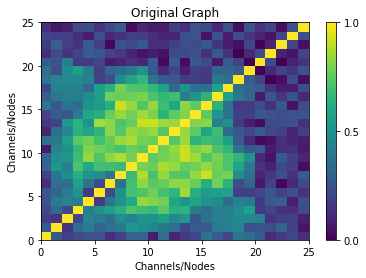

AttributeError: ignored

In [4]:


def random_ref(matrix):
  G = nx.convert_matrix.from_numpy_array(matrix)
  G_ref = nx.algorithms.smallworld.random_reference(G)
  return nx.convert_matrix.to_numpy_array(G_ref)

def lattice_ref(matrix):
  G = nx.convert_matrix.from_numpy_array(matrix)
  G_ref = nx.algorithms.smallworld.lattice_reference(G)
  return nx.convert_matrix.to_numpy_array(G_ref)

g = generate_graph(n_nodes=25, regularity=0.15)
plot_graph(g, title="Original Graph")
plot_graph(random_ref(g), title="Graph shuffled with networkx random ref")
plot_graph(lattice_ref(g), title="Graph shuffled with networkx lattice ref")

## Define the graph measures needed for small worldness

If not stated otherwise, all formulas are taken from:

Rubinov & Sporns (2010). Complex network measures of brain connectivity: Uses and interpretations

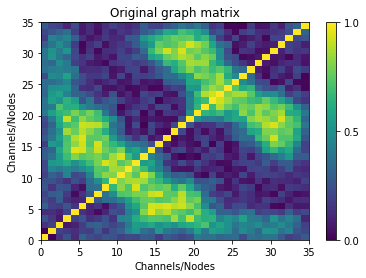

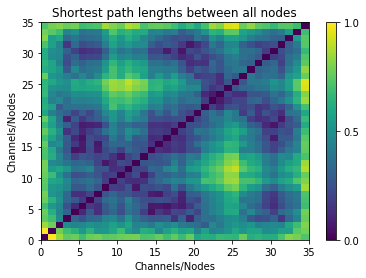

In [38]:
def weighted_shortest_path(matrix):
  """
  Calculate the shortest path lengths between all nodes in a weighted graph.

  This is an implementation of the Floyd-Warshall algorithm for finding the shortest
  path lengths of an entire graph matrix. Implementation taken from:
  https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm
  """
  inverse_mapping = np.max(matrix) - matrix

  n_nodes = len(matrix)
  distances = np.empty([n_nodes, n_nodes])
  for i in range(n_nodes):
    for j in range(n_nodes):
      distances[i,j] = inverse_mapping[i, j]
  
  # not sure if we even need this, since the coherences of [i,i] are always 1 and therefore 0 in the inverse mapping
  #for i in range(n_nodes):
  #  distances[i,i] = 0

  for k in range(n_nodes):
    for i in range(n_nodes):
      for j in range(n_nodes):
        if distances[i, j] > distances[i, k] + distances[k, j]:
          distances[i, j] = distances[i, k] + distances[k, j]

  return distances


def weighted_characteristic_path_length(matrix):
  """Calculate the characteristic path length for weighted graphs."""
  n_nodes = len(matrix)
  min_distances = weighted_shortest_path(matrix)

  sum_vector = np.empty(n_nodes)
  for i in range(n_nodes):
    # calculate the inner sum
    sum_vector[i] = (1/(n_nodes-1)) * np.sum([min_distances[i, j] for j in range(n_nodes) if j != i])

  return (1/n_nodes) * np.sum(sum_vector)


def weighted_node_degree(matrix):
  """Calculate the node degree for all nodes in a weighted graph."""
  return np.sum(matrix, axis=-1)


def weighted_triangle_number(matrix):
  """Calculate the weighted geometric mean of triangles around i for all nodes i in a weighted graph."""
  n_nodes = len(matrix)

  mean_vector = np.empty([n_nodes])
  for i in range(n_nodes):
    triangles = np.array([[matrix[i, j] * matrix[i, h] * matrix[j, h] for j in range(n_nodes)] for h in range(n_nodes)])**(1/3)
    mean_vector[i] = (1/2) * np.sum(triangles, axis=(0,1))
  
  return mean_vector


def weighted_clustering_coeff(matrix):
  """Calculate the clustering coefficient for a weighted graph."""
  n = len(matrix)
  t = weighted_triangle_number(matrix)
  k = weighted_node_degree(matrix)  # FIXME: k is denoted by rubinov to be the non weighted k. Can this be right? How to measure non weighted k for weighted graphs?

  return (1/n) * np.sum((2 * t)/(k * (k - 1)))


def weighted_sw_sigma(matrix):
  """Calculate the weighted small world coefficient sigma of a matrix."""
  random_graph = random_ref(matrix)
  C = weighted_clustering_coeff(matrix)
  C_rand = weighted_clustering_coeff(random_graph)
  L = weighted_characteristic_path_length(matrix)
  L_rand = weighted_characteristic_path_length(random_graph)

  return (C/C_rand) / (L/L_rand)

def weighted_sw_omega(matrix):
  """Calculate the weighted small world coefficient omega of a matrix."""
  random_graph = random_ref(matrix)
  lattice_graph = lattice_ref(matrix)
  C = weighted_clustering_coeff(matrix)
  C_latt = weighted_clustering_coeff(lattice_graph)
  L = weighted_characteristic_path_length(matrix)
  L_rand = weighted_characteristic_path_length(random_graph)

  return (L_rand/L) / (C/C_latt)


def weighted_sw_index(matrix):
  """Calculate the weighted small world coefficient omega of a matrix."""
  random_graph = random_ref(matrix)
  lattice_graph = lattice_ref(matrix)
  C = weighted_clustering_coeff(matrix)
  C_rand = weighted_clustering_coeff(random_graph)
  C_latt = weighted_clustering_coeff(lattice_graph)
  L = weighted_characteristic_path_length(matrix)
  L_rand = weighted_characteristic_path_length(random_graph)
  L_latt = weighted_characteristic_path_length(lattice_graph)
  return ((L - L_latt) / (L_rand - L_latt)) * ((C - C_rand) / (C_latt - C_rand))

# get an intuition for the shortest path length matrix
matrix = generate_graph(n_nodes=35, regularity=0.2)
wsp = weighted_shortest_path(matrix)

plot_graph(matrix, title="Original graph matrix")
plot_graph(wsp, title="Shortest path lengths between all nodes")

## Measure Small-Worldness

Feel free to play around a little bit.

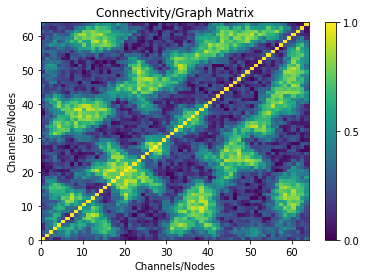

Small worldness coefficient:  0.22859438791776787

Multiple small world measures of the same network graph:

 [0.23982422 0.18922787 0.18233996 0.27976389 0.22568264 0.20302859
 0.21781924 0.22406529 0.23151535 0.24908397]


In [ ]:
# generate a new graph
graph = generate_graph(n_nodes=64, regularity=0.15)

# plot it
plot_graph(graph)


# now we can calculate the small worldness of this one
small_world = weighted_small_world_coeff(graph)
print("Small worldness coefficient: ", small_world)


# actually we can calculate the small worldness multiple times and see how much the random graph affects the outcome.
small_world_list = np.array([weighted_small_world_coeff(graph) for i in range(10)])
print("\nMultiple small world measures of the same network graph:\n\n", small_world_list)

As we can see, the small worldness measure has quite some variance in it. We should probably calculate it multiple times and average!

## Other Graph measures
Define some other graph measures that are interesting.

In [ ]:

def weighted_global_efficiency(matrix):
  """The weighted global efficiency is closely related to the characteristic path length."""
  n_nodes = len(matrix)
  inverse_min_distances = weighted_shortest_path(matrix)

  sum_vector = np.empty(n_nodes)
  for i in range(n_nodes):
    # calculate the inner sum
    sum_vector[i] = (1/(n_nodes-1)) * np.sum([1 / inverse_min_distances[i, j] for j in range(n_nodes) if j != i])

  return (1/n_nodes) * np.sum(sum_vector)


def weighted_transitivity(matrix):
  """The transitivity is related to the clustering coefficient."""
  
  n = len(matrix)
  t = weighted_triangle_number(matrix)
  k = weighted_node_degree(matrix)  # FIXME: k is denoted by rubinov to be the non weighted k. Can this be right? How to measure non weighted k for weighted graphs?
  
  return np.sum(2 * t) / np.sum(k * (k - 1))


## Compare Small-World coefficient with other graph measures
Calculate all interesting measures on a set of graphs and check their correlation.

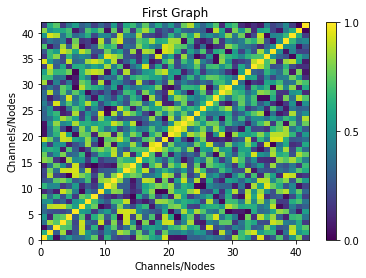

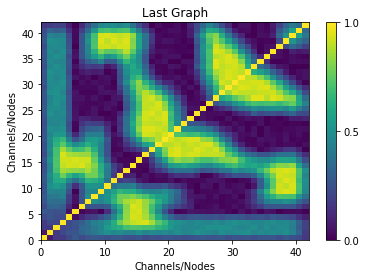

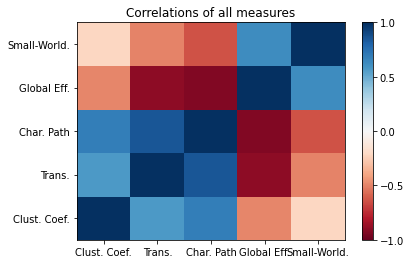

[[ 1.          0.57311504  0.68935905 -0.48927037 -0.21786821]
 [ 0.57311504  1.          0.85311081 -0.89204691 -0.49661955]
 [ 0.68935905  0.85311081  1.         -0.9252899  -0.63908281]
 [-0.48927037 -0.89204691 -0.9252899   1.          0.62847005]
 [-0.21786821 -0.49661955 -0.63908281  0.62847005  1.        ]]


In [ ]:
# first generate multiple graphs to compare
graphs = [generate_graph(n_nodes=42, regularity=0.01*i) for i in range(100)]

# plot some of them
plot_graph(graphs[0], "First Graph")
plot_graph(graphs[-1], "Last Graph")


# calculate different graph measures
clustering_coeffs =     [weighted_clustering_coeff(graph) for graph in graphs]
transitivities =        [weighted_transitivity(graph) for graph in graphs]
characteristic_paths =  [weighted_characteristic_path_length(graph) for graph in graphs]
global_efficiencies =   [weighted_global_efficiency(graph) for graph in graphs]
small_worldness =       [weighted_small_world_coeff(graph) for graph in graphs]


# concatenate them and put them into a correlation matrix
measures = np.vstack([clustering_coeffs, transitivities, characteristic_paths,
                      global_efficiencies, small_worldness])
corr_matrix = np.corrcoef(measures)


# plot the results
plt.pcolormesh(corr_matrix, vmin=-1, vmax=1, cmap="RdBu")
plt.title("Correlations of all measures")
labels = ["Clust. Coef.", "Trans.", "Char. Path", "Global Eff.", "Small-World."]
ax = plt.gca()
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xticks(np.arange(5)+0.5)
plt.yticks(np.arange(5)+0.5)
plt.colorbar(ticks=[-1, -.5, 0, .5, 1])
plt.show()

# also print the numbers
print(corr_matrix)

